In [17]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [18]:
# Load new dataset
df = pd.read_csv("../05_clean_data/processed_data_revised.csv")
df.head()

,date,total_activity,citation_issued,citation_rate,day_of_week,month,days_end_month,end_of_month,year,days_end_year,end_of_year,quarter,days_end_quarter,end_of_quarter,city,state
0,2010-12-31,122,13,0.106557,5,12,0,True,2010,181.0,False,2.0,0.0,True,denver,co
1,2011-01-01,176,23,0.130682,6,1,30,False,2011,180.0,False,3.0,89.0,False,denver,co
2,2011-01-02,214,24,0.112150,7,1,29,False,2011,179.0,False,3.0,88.0,False,denver,co
3,2011-01-03,250,32,0.128000,1,1,28,False,2011,178.0,False,3.0,87.0,False,denver,co
4,2011-01-04,296,44,0.148649,2,1,27,False,2011,177.0,False,3.0,86.0,False,denver,co


In [19]:
# make a loop to create a dictionary with the number of days for each year from 2010 to 2019
years = []
for i in range(2000, 2021):
    years.append(i)
days = dict()
temp_dict = dict()
for year in years:
    day_year = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)).days
    # calculate the number of days for each month in the year
    for month in range(1, 12):
        day_month = (
            dt.date(year, month + 1, 1) - dt.date(year, month, 1)
        ).days
        temp_dict[month] = day_month
    days[year] = day_year, temp_dict

In [20]:
# get a unique list of all the cities
cities = df["city"].unique()
year_missing = dict()
# loop through all the cities and year
for city in cities:
    # make a city dataframe that omits data when citation_issued == 0
    df_city = df[(df["city"] == city) & (df["citation_issued"] != 0)]
    # group by year and get the unique counts of date column
    year_dict = (df_city.groupby("year")["date"].nunique()).to_dict()
    # get the keys as a list
    keys_dict = list(year_dict.keys())
    # loop through the keys
    temp_dict = dict()
    for key in keys_dict:
        # check if the key is in the dictionary
        if key in days.keys():
            # if the key is in the dictionary, then get the value
            value = days[key][0]
            # check the difference of the value and the dictionary value
            if value != year_dict[key]:
                print(
                    f"The city {city} missing {value - year_dict[key]} days in the year {key}"
                )
                temp_dict[key] = value - year_dict[key]
        elif key not in days.keys():
            print(
                f"The city {city} has data for the year {key} but the year is not in the dictionary"
            )
        else:
            pass
        year_missing[city] = temp_dict

The city denver missing 364 days in the year 2010
The city denver missing 165 days in the year 2018
The city winston-salem missing 336 days in the year 2000
The city winston-salem missing 342 days in the year 2001
The city winston-salem missing 1 days in the year 2002
The city winston-salem missing 1 days in the year 2003
The city winston-salem missing 10 days in the year 2014
The city winston-salem missing 27 days in the year 2015
The city saintpaul missing 364 days in the year 2002
The city saintpaul missing 359 days in the year 2003
The city saintpaul missing 355 days in the year 2004
The city saintpaul missing 129 days in the year 2005
The city saintpaul missing 1 days in the year 2009
The city saintpaul missing 1 days in the year 2010
The city saintpaul missing 1 days in the year 2015
The city saintpaul missing 31 days in the year 2016
The city seattle missing 3 days in the year 2007
The city seattle missing 2 days in the year 2012
The city cincinnati missing 226 days in the year 

> That is the summary of all the cities with missing data, we're gonna drop the  year with more than 15 days of missing data (10 Federal holidays, 5 added days to accomodate leap years and possible state or city holidays).

In [21]:
# Summary in dictionary form
year_missing

{'denver': {2010: 364, 2018: 165},
 'winston-salem': {2000: 336, 2001: 342, 2002: 1, 2003: 1, 2014: 10, 2015: 27},
 'saintpaul': {2002: 364,
  2003: 359,
  2004: 355,
  2005: 129,
  2009: 1,
  2010: 1,
  2015: 1,
  2016: 31},
 'seattle': {2007: 3, 2012: 2},
 'cincinnati': {2018: 226},
 'greensboro': {2000: 77, 2001: 41, 2006: 3, 2008: 1, 2014: 16},
 'sanantonio': {2020: 184},
 'oklahomacity': {2017: 74, 2020: 224},
 'fayetteville': {2000: 285,
  2001: 284,
  2004: 8,
  2005: 2,
  2006: 1,
  2009: 80,
  2012: 1},
 'sanjose': {2013: 243, 2017: 2, 2018: 275},
 'madison': {2007: 271, 2017: 94, 2020: 199},
 'neworleans': {2010: 362, 2011: 120, 2018: 167},
 'raleigh': {2004: 29,
  2005: 120,
  2006: 62,
  2007: 30,
  2008: 30,
  2009: 31,
  2012: 30,
  2013: 60,
  2014: 62,
  2015: 39},
 'aurora': {2020: 153},
 'bakersfield': {2008: 80, 2009: 10, 2010: 1, 2018: 297},
 'houston': {2020: 57},
 'charlotte': {2000: 105, 2001: 118, 2008: 29, 2010: 1},
 'sanfrancisco': {2014: 1, 2016: 184},
 'balt

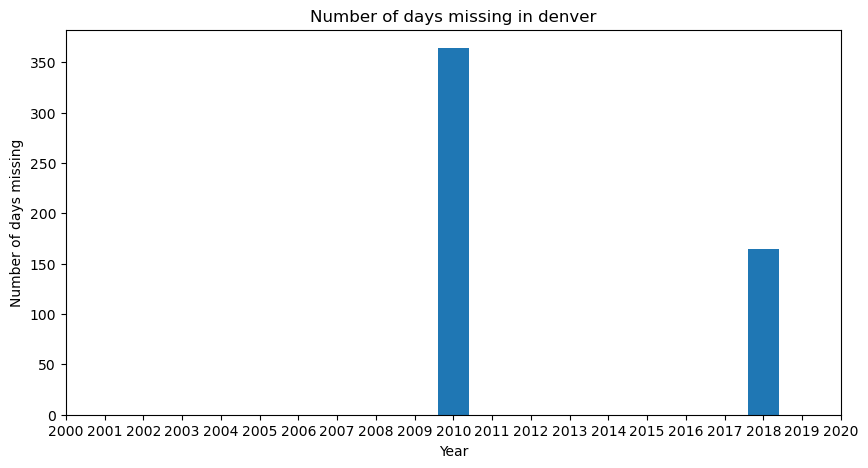

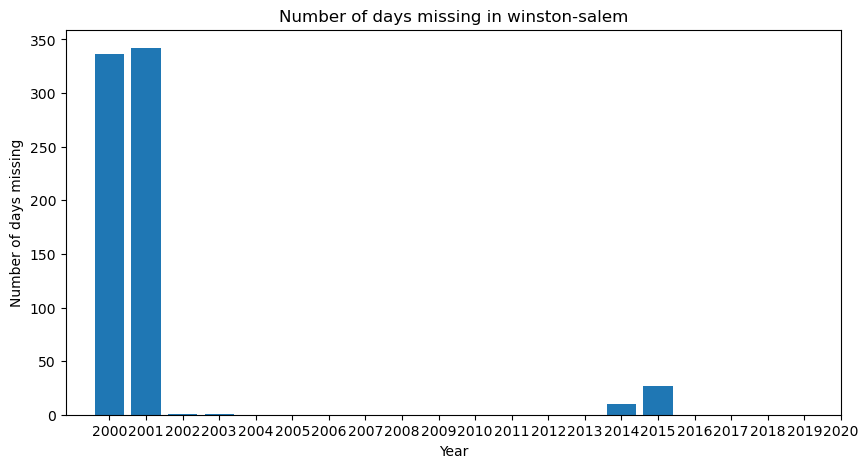

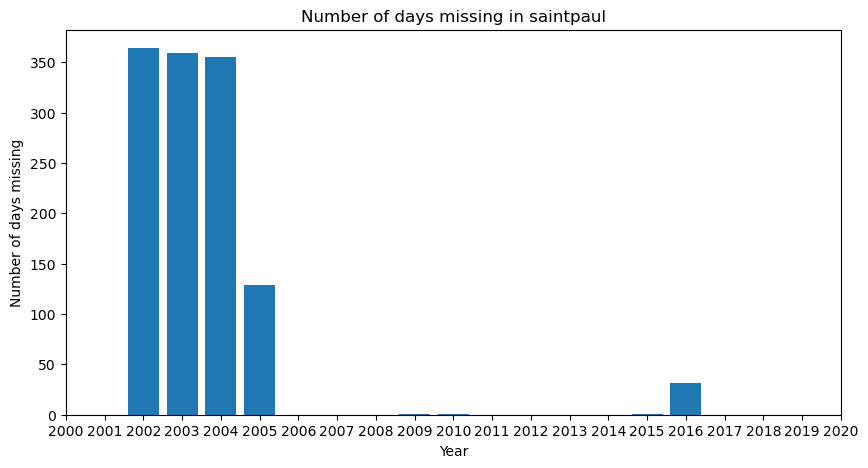

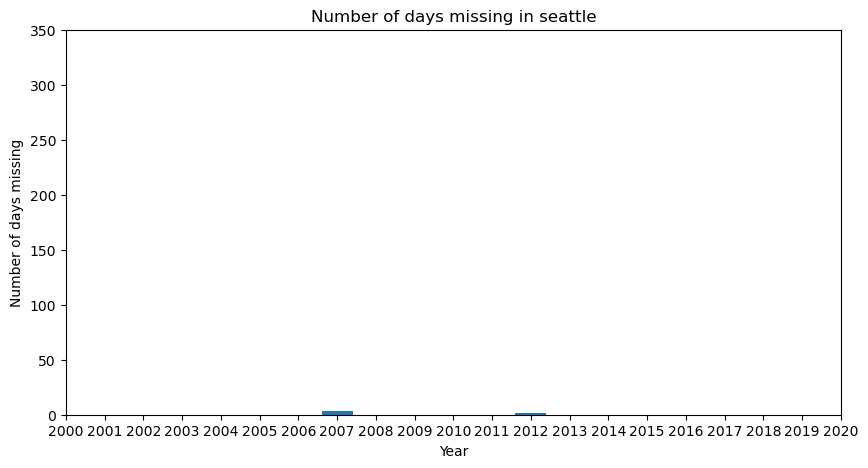

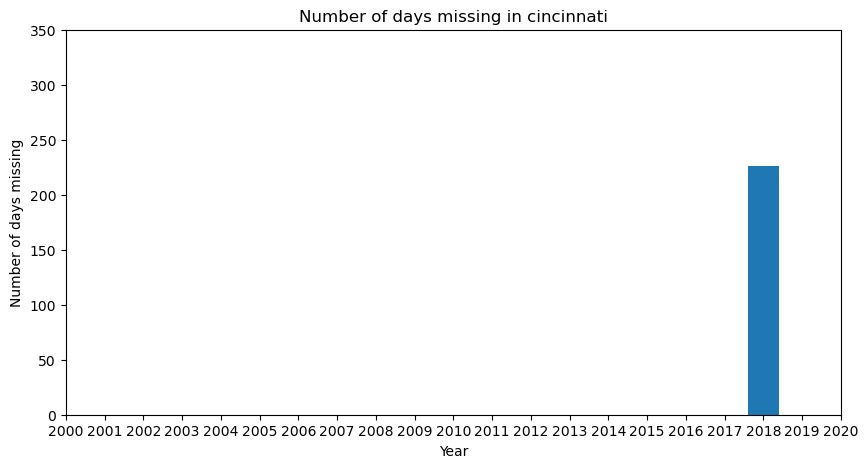

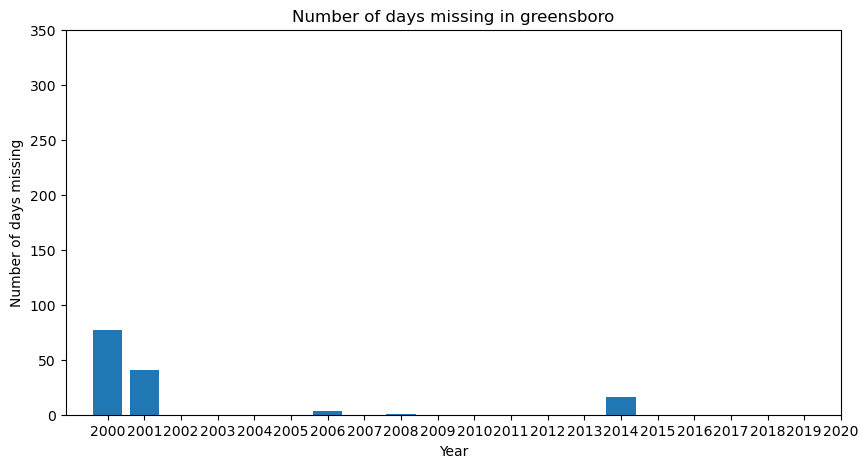

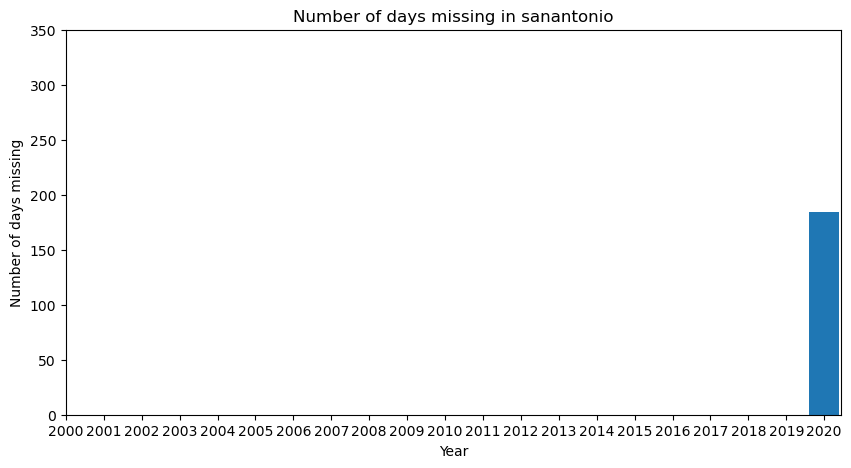

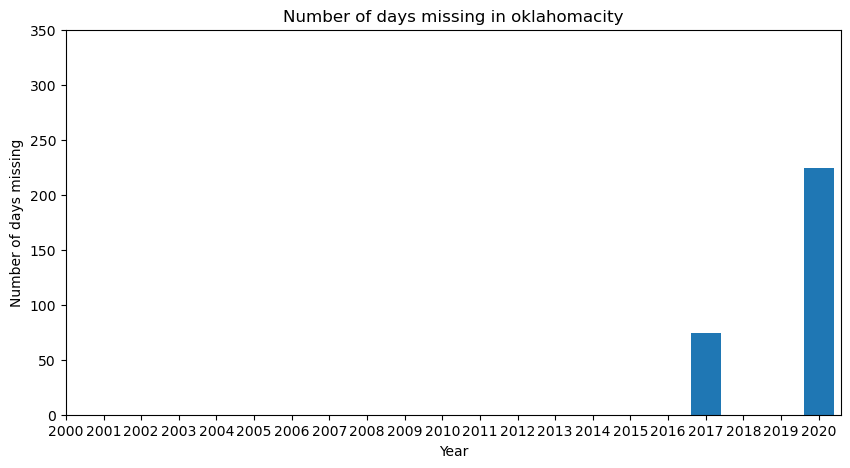

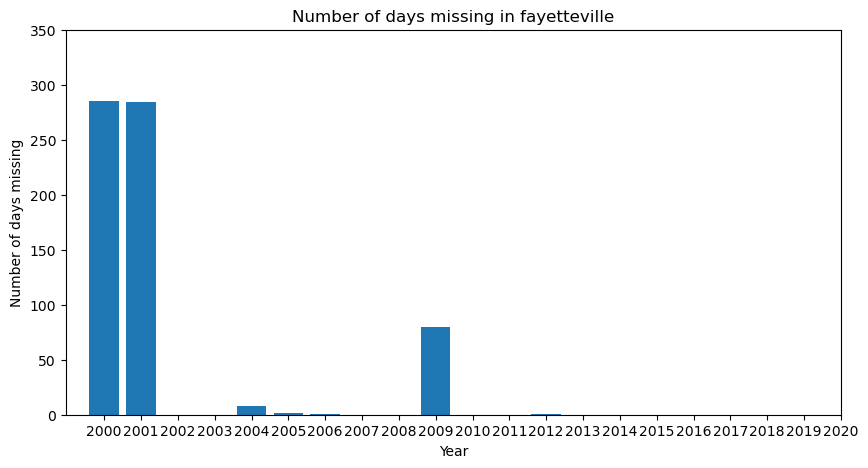

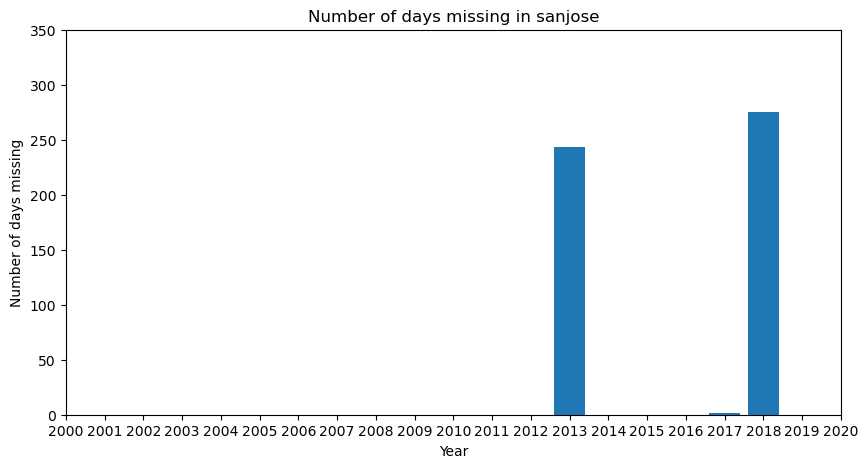

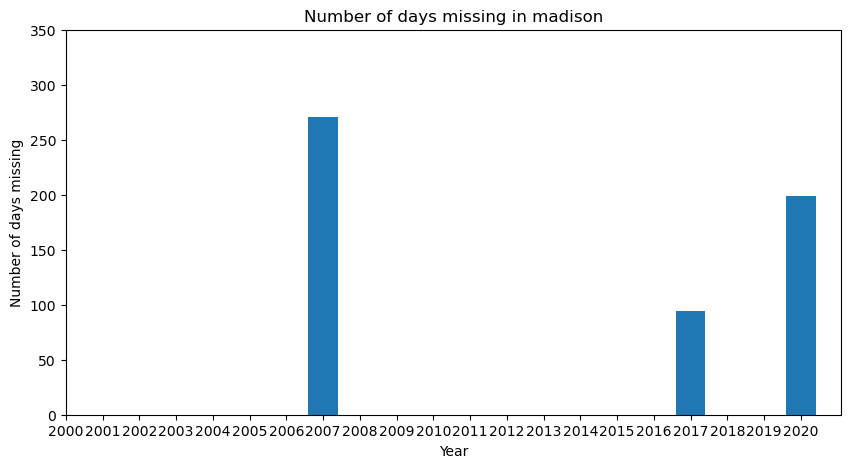

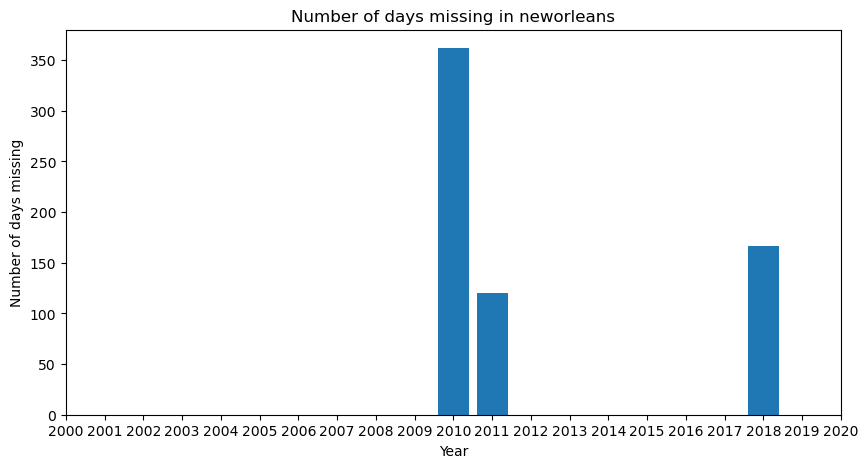

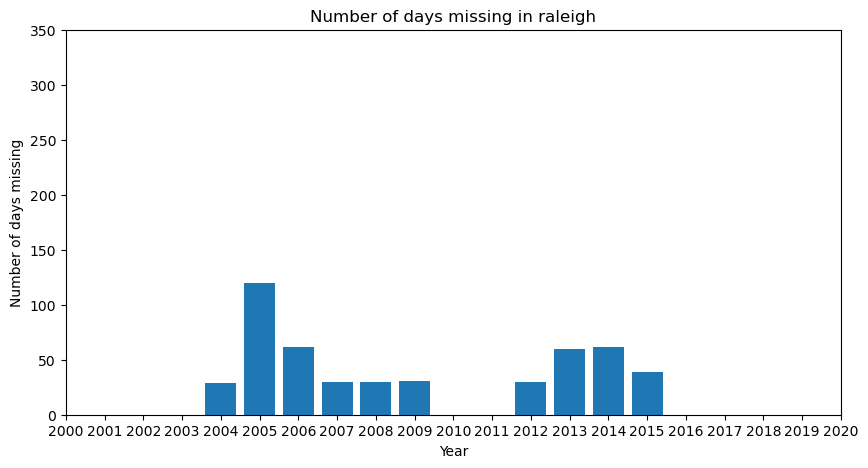

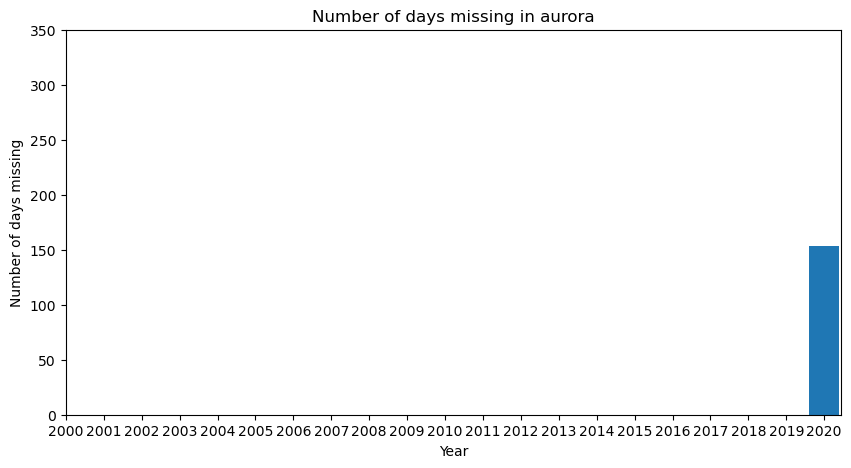

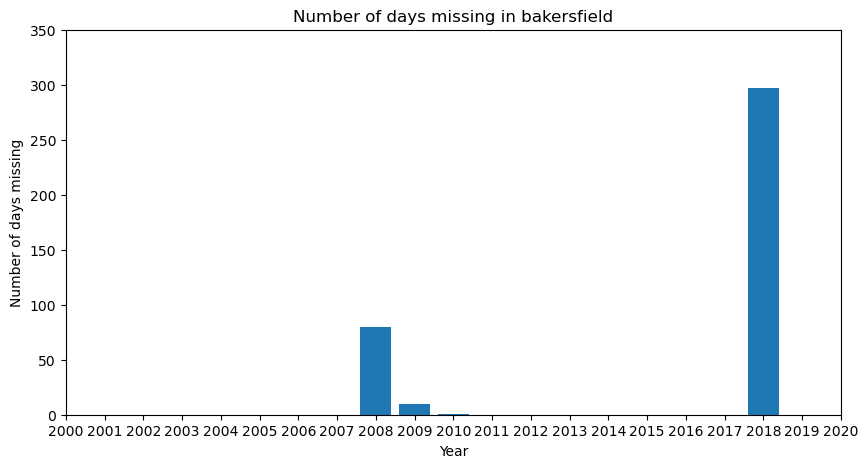

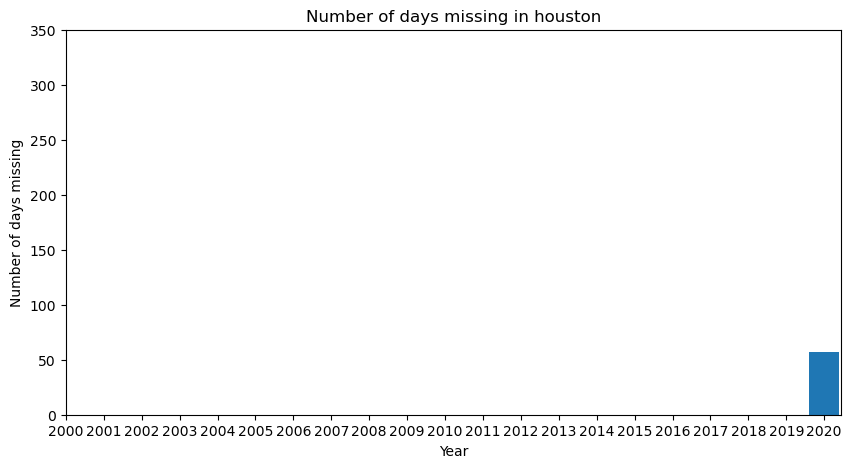

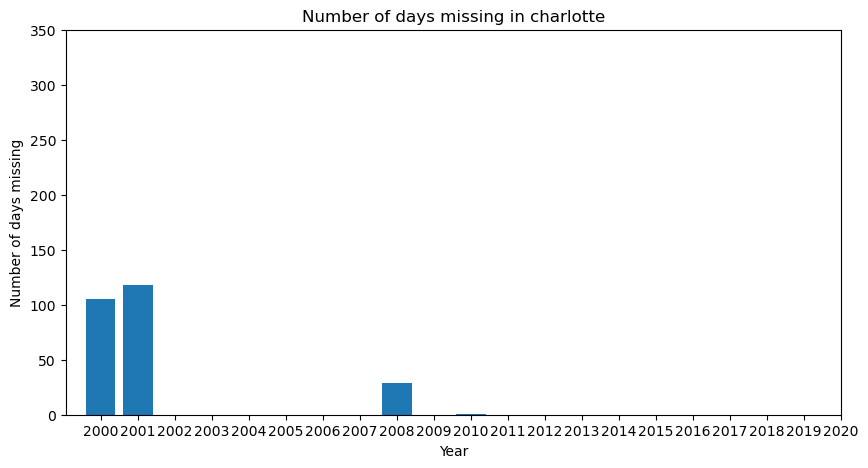

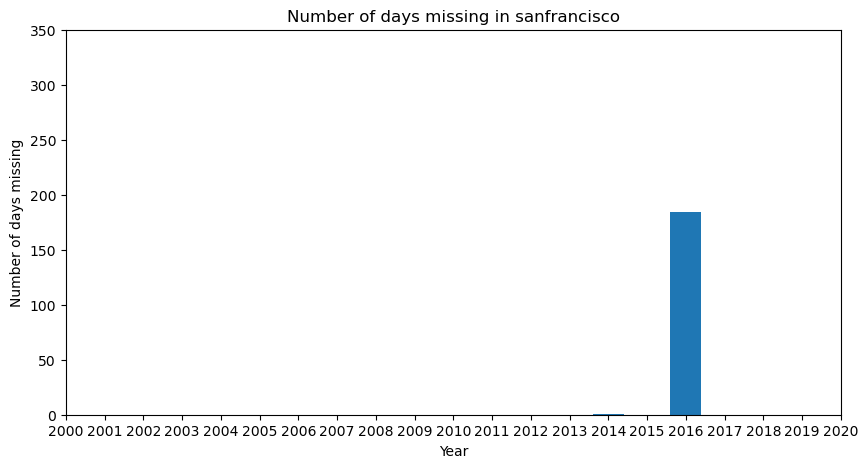

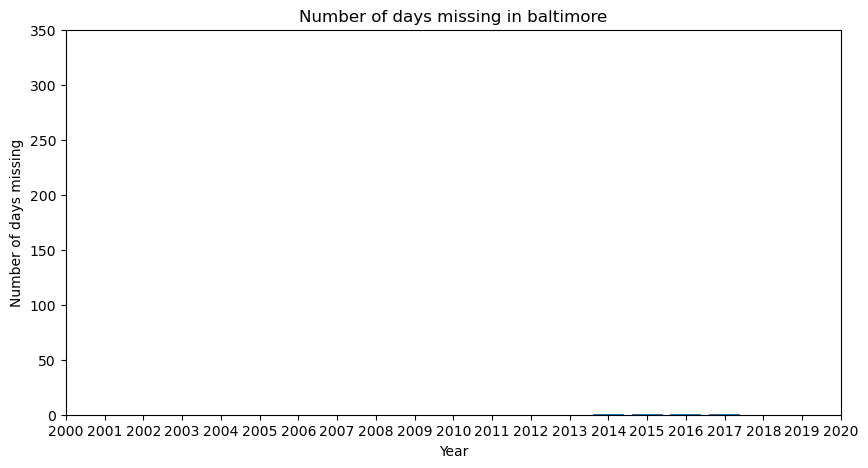

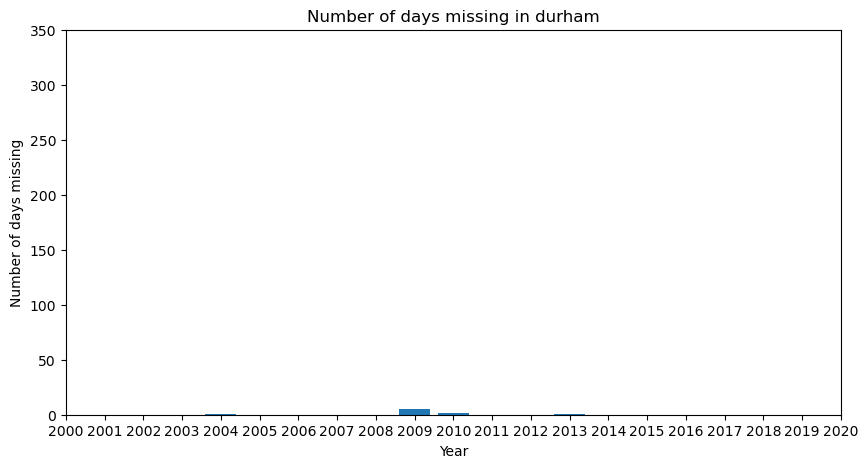

In [22]:
# make a plot of year_missing
for city in year_missing.keys():
    plt.figure(figsize=(10, 5))
    plt.bar(year_missing[city].keys(), year_missing[city].values())
    plt.xticks(np.arange(2000, 2021, 1))
    plt.yticks(np.arange(0, 400, 50))
    plt.title(f"Number of days missing in {city}")
    plt.xlabel("Year")
    plt.ylabel("Number of days missing")
    plt.show()

In [33]:
df_cleaned = df.copy()

# print the number of rows before dropping
print(f"Number of rows before dropping: {df_cleaned.shape[0]}")

# drop the rows from cities and year that exist in the year_missing dictionary 
# and have values > 15
for city in year_missing.keys():
    for year in year_missing[city].keys():
        if year_missing[city][year] > 15:
            df_cleaned = df_cleaned.drop(
                df_cleaned[
                    (df_cleaned["city"] == city) & (df_cleaned["year"] == year)
                ].index
            )
        else:
            pass

# additional remove for saintpaul 2001
df_cleaned = df_cleaned.drop(
    df_cleaned[
        (df_cleaned["city"] == "saintpaul") & (df_cleaned["year"] == 2001)
    ].index
)

# print the number of rows after dropping
print(f"Number of rows after dropping: {df_cleaned.shape[0]}")

Number of rows before dropping: 78240
Number of rows after dropping: 66067


In [34]:
# count all the citation_issued == 0 and find out the name of the cities and year
df_cleaned[(df_cleaned["citation_issued"] == 0)].groupby(["city", "year"])[
    "date"
].count()

city           year
charlotte      2010    1
durham         2001    1
               2009    4
               2010    2
               2013    1
fayetteville   2004    2
               2005    2
               2012    1
greensboro     2006    1
saintpaul      2009    1
               2010    1
               2015    1
seattle        2012    2
winston-salem  2002    1
               2003    1
               2014    3
Name: date, dtype: int64

In [35]:
df_cleaned.to_csv("../05_clean_data/processed_data_revised_r2.csv", index=False)